by Yigao Li

# Exercise 1  
$$f(x)=x^2, \alpha=\beta=\frac{1}{2}, x_0=1$$
$$f'(x)=2x, f'(x_0)=2, \Delta x_0=-f'(x_0)=-2$$
$$f(x_0)+\beta^n\Delta x_0)\leq f(x_0)+\alpha\beta^n\Delta x_0f'(x_0)$$
$$(1-2\times\frac{1}{2^n})^2\leq1-2\times\frac{1}{2^n}$$
$$n=0, 1\leq-1, False$$
$$n=1, 0\leq0, True$$
$$x_1=x_0+\beta^1\Delta x_0=1+\frac{1}{2}(-2)=0$$

$$f'(x_1)=0, \Delta x_1=-f'(x_1)=0$$
$$f(x_1)+\beta^n\Delta x_1)\leq f(x_1)+\alpha\beta^n\Delta x_1f'(x_1)$$
$$0\leq0$$
$$x_2=x_1+\beta^0\Delta x_1=0$$

# Exercise 2  
$$g(x)=f(x_k)+f'(x_k)(x-x_k)+\frac{1}{2}f''(x_k)(x-x_k)^2$$
$$g'(x)=f'(x_k)+f''(x_k)(x-x_k)=0$$
$$x=x_k-\frac{f'(x_k)}{f''(x_k)}=x_{k+1}$$
If $f$ is convex, the sequence of $x_n$ converges to minimizer $x^*$.

# Exercise 3  
(a) $f(x)=\frac{e^x}{x}$  

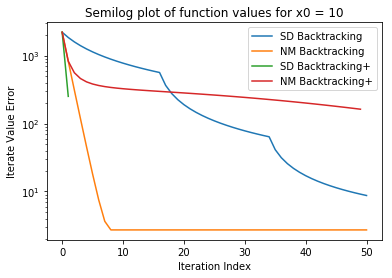

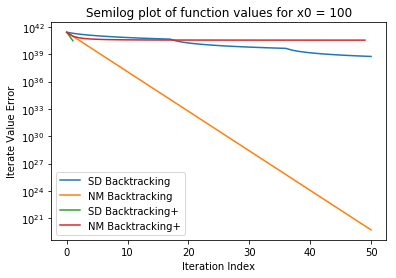

Python cannot proceed with x0 = 1000 because value is either too large or too small.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
def backtracking1D(x0, dx, f, df0, alpha=0.4, beta=0.8, verbose=False):
    '''
    Backtracking for 1D functions with illustrations
    :param x0: Previous point from backtracking, or initial guess
    :param dx: Incremental factor for updating x0
    :param f: Objective function
    :param df0: Derivative of f at x0
    :param alpha: Sloping factor of stopping criterion
    :param beta: "Agressiveness" parameter for backtracking steps
    :param verbose: Boolean for providing plots to illustrate
    :return: x1, the next iterate in backtracking
    '''
    
    if verbose:
        n=0
        xs = [x0 + dx] * 3
    
    ######################################
    # The core of the algorithm
    ######################################
    delta = alpha * dx * df0 
    t = 1 # Initialize t=beta^0
    f0 = f(x0) # Evaluate for future use
    x = x0 + dx # Initialize x_{0, inner}
    fx = f(x)
    while (not np.isfinite(fx)) or f0 + delta * t < fx:
        t = beta * t
        x = x0 + t * dx
        fx = f(x)
    ###################################### 
    
        if verbose:
            n += 1
            xs.append(x)
            xs.pop(0)
            
    if verbose: 
        u = 1.1 * np.abs(xs[0] - x0)
        l = 0.1 * np.abs(xs[0] - x0)
        if dx < 0:
            s = np.linspace(x0 - u, x0 + l, 100)
            xi = [x0-u, x0]
            fxi = [f(x0) - alpha*u*df0, f(x0)]
        else:
            s = np.linspace(x0 - l, x0 + u, 100)
            xi = [x0, x0 + u]
            fxi = [f(x0), f(x0) + alpha*u*df0]
            
        y = np.zeros(len(s))
        for i in range(len(s)):
            y[i] = f(s[i]) # Slow for vectorized functions
            
        plt.figure('Backtracking illustration')
        arm, =plt.plot(xi, fxi, '--', label='Armijo Criterion')
        fcn, =plt.plot(s, y, label='Objective Function')
        plt.plot([s[0], s[-1]], [0, 0], 'k--')
        pts =plt.scatter(xs, [0 for p in xs], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        plt.scatter(xs, [f(p) for p in xs], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        init =plt.scatter([x0], [f(x0)], color='black', label='Initial point')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend(handles=[arm, fcn, pts, init])
        plt.show()
    
    return x

def accelerated_backtracking1D(k, tk, x0, x1, dx, f, df, beta=0.8, verbose=False):
    '''
    Accelerated backtracking for 1D functions with illustrations
    :param k: Index of the current accelerated backtracking iteration; k=1 for the first
    :param tk: The t from the previous accelerated backtracking iteration; tk=1 for the first
    :param x0: Next most recent point from accelerated backtracking
    :param x1: Most recent point from accelerated backtracking; x1=x0 for the first iteration
    :param dx: Incremental factor for updating x1
    :param f: Objective function
    :param df: Derivative function of f
    :param beta: "Agressiveness" parameter for backtracking steps
    :param verbose: Boolean for providing plots to illustrate
    :return: x, t the next iterate and initial t in accelerated backtracking
    '''
    
    y = x1 + (k-1)*(x1 - x0)/(k+2) # Base point for accelerated backtracking
    
    if verbose:
        n=0
        xs = [y + tk*dx] * 3
    
    t = tk # Initialize t from the last iteration; t_0=1
    x = y + t*dx
    fx = f(x)
    fy = f(y)
    dfy = df(y)
    delta = dfy * dx

    
    while (not np.isfinite(fx)) or fy + delta*t + t*dx**2/2 < fx:
        t = beta * t
        x = y + t*dx
        fx = f(x)
    
        if verbose:
            n += 1
            xs.append(x)
            xs.pop(0)
            
    if verbose: 
        u = 1.1 * np.abs(xs[0] - y)
        l = 0.1 * np.abs(xs[0] - y)
        if dx < 0:
            s = np.linspace(y - u, y + l, 100)
            xi = np.linspace(y-u, y, 100)
        else:
            s = np.linspace(y - l, y + u, 100)
            xi = np.linspace(y, y + u, 100)
        dxi = xi-y
        fxi = fy + dfy*dxi + dxi*dx/2
            
        z = np.zeros(len(s))
        for i in range(len(s)):
            z[i] = f(s[i]) # Slow for vectorized functions
            
        plt.figure('Accelerated Backtracking illustration')
        plt.plot([s[0], s[-1]], [0, 0], 'k--')
        arm, =plt.plot(xi, fxi, '--', label='Stopping Criterion')
        fcn, =plt.plot(s, z, label='Objective Function')
        pts =plt.scatter(xs, [0 for p in xs], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        plt.scatter(xs, [f(p) for p in xs], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        init =plt.scatter([y], [fy], label='Initial point', color='black')
        plt.legend(handles=[arm, fcn, pts, init])
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.show()
    
    return x, t

f = lambda x: exp(x)/x
df = lambda x: exp(x)/x - exp(x)/(x**2)
d2f = lambda x: exp(x)/x - 2*exp(x)/(x**2) + 2*exp(x)/(x**3)

iter = 50 # 50 iterations of each

# Comparison with backtracking and accelerated backtracking using increments from both steepest descent and Newton's method

for x0 in [10,100,1000]:
    try:
        x_sd_bt = [x0]
        f_sd_bt = [f(x0)]
        x = x0
        for i in range(iter):
            x = backtracking1D(x, -df(x), f, df(x), alpha = 0.8, beta = 0.1)
            x_sd_bt.append(x)
            f_sd_bt.append(f(x))

        x_nm_bt = [x0]
        f_nm_bt = [f(x0)]
        x = x0
        for i in range(iter):
            x = backtracking1D(x, -df(x)/d2f(x), f, df(x))
            x_nm_bt.append(x)
            f_nm_bt.append(f(x))
    
        x_sd_abt = [x0]
        f_sd_abt = [f(x0)]
        x = backtracking1D(x0, -df(x0), f, df(x0))
        x_sd_abt.append(x)
        f_sd_abt.append(f(x))
        t = 1
        for i in range(2,iter):
            x, t = accelerated_backtracking1D(i+1, t, x_sd_abt[i-2], x_sd_abt[i-1], -df(x), f, df)
            x_sd_abt.append(x)
            f_sd_abt.append(f(x))

        x_nm_abt = [x0]
        f_nm_abt = [f(x0)]
        x = backtracking1D(x0, -df(x0)/d2f(x0), f, df(x0))
        x_nm_abt.append(x)
        f_nm_abt.append(f(x))
        t = 1
        for i in range(2, iter):
            x, t = accelerated_backtracking1D(i+1, t, x_nm_abt[i-2], x_nm_abt[i-1], -df(x)/d2f(x), f, df)
            x_nm_abt.append(x)
            f_nm_abt.append(f(x))

        # Compare convergence of function values with semilog plot
        sd_bt, = plt.semilogy(f_sd_bt, label='SD Backtracking')
        nm_bt, = plt.semilogy(f_nm_bt, label='NM Backtracking')
        sd_abt, = plt.semilogy(f_sd_abt, label='SD Backtracking+')
        nm_abt, = plt.semilogy(f_nm_abt, label='NM Backtracking+')
        plt.xlabel('Iteration Index')
        plt.ylabel('Iterate Value Error')
        plt.legend(handles=[sd_bt, nm_bt, sd_abt, nm_abt])
        plt.title('Semilog plot of function values for x0 = %s'%x0)
        plt.show()
    except OverflowError:
        print("Python cannot proceed with x0 =", x0, "because value is either too large or too small.")
    

(b) $f(x)=log(x^2+1)+log((x-1)^2+1)+log((x-\frac{3}{2})^2+1$

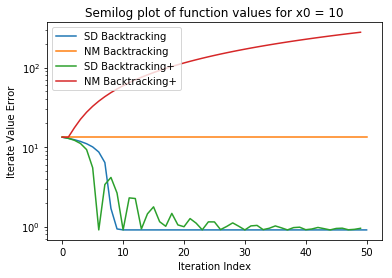

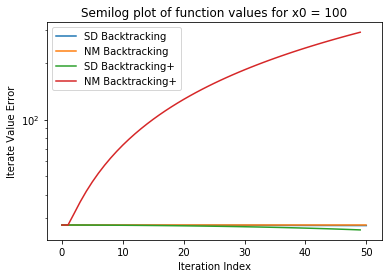

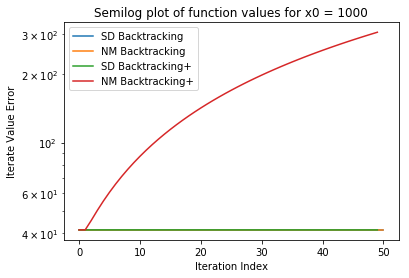

In [47]:
f = lambda x: log(x**2+1) + log((x-1)**2+1) + log((x-3/2)**2+1)
df = lambda x: 2*x/(x**2+1) + 2*(x-1)/((x-1)**2+1) + 2*(x-3/2)/((x-3/2)**2+1)
d2f = lambda x: 2*(1-x**2)/(x**2+1)**2 + 2*(1-(x-1)**2)/((x-1)**2+1)**2 + 2*(1-(x-3/2)**2)/((x-3/2)**2+1)**2

iter = 50 # 50 iterations of each

# Comparison with backtracking and accelerated backtracking using increments from both steepest descent and Newton's method

for x0 in [10,100,1000]:
    try:
        x_sd_bt = [x0]
        f_sd_bt = [f(x0)]
        x = x0
        for i in range(iter):
            x = backtracking1D(x, -df(x), f, df(x), alpha = 0.4, beta = 0.8)
            x_sd_bt.append(x)
            f_sd_bt.append(f(x))

        x_nm_bt = [x0]
        f_nm_bt = [f(x0)]
        x = x0
        for i in range(iter):
            x = backtracking1D(x, -df(x)/d2f(x), f, df(x))
            x_nm_bt.append(x)
            f_nm_bt.append(f(x))
    
        x_sd_abt = [x0]
        f_sd_abt = [f(x0)]
        x = backtracking1D(x0, -df(x0), f, df(x0))
        x_sd_abt.append(x)
        f_sd_abt.append(f(x))
        t = 1
        for i in range(2,iter):
            x, t = accelerated_backtracking1D(i+1, t, x_sd_abt[i-2], x_sd_abt[i-1], -df(x), f, df)
            x_sd_abt.append(x)
            f_sd_abt.append(f(x))

        x_nm_abt = [x0]
        f_nm_abt = [f(x0)]
        x = backtracking1D(x0, -df(x0)/d2f(x0), f, df(x0))
        x_nm_abt.append(x)
        f_nm_abt.append(f(x))
        t = 1
        for i in range(2, iter):
            x, t = accelerated_backtracking1D(i+1, t, x_nm_abt[i-2], x_nm_abt[i-1], -df(x)/d2f(x), f, df)
            x_nm_abt.append(x)
            f_nm_abt.append(f(x))

        # Compare convergence of function values with semilog plot
        sd_bt, = plt.semilogy(f_sd_bt, label='SD Backtracking')
        nm_bt, = plt.semilogy(f_nm_bt, label='NM Backtracking')
        sd_abt, = plt.semilogy(f_sd_abt, label='SD Backtracking+')
        nm_abt, = plt.semilogy(f_nm_abt, label='NM Backtracking+')
        plt.xlabel('Iteration Index')
        plt.ylabel('Iterate Value Error')
        plt.legend(handles=[sd_bt, nm_bt, sd_abt, nm_abt])
        plt.title('Semilog plot of function values for x0 = %s'%x0)
        plt.show()
    except OverflowError:
        print("Python cannot proceed with x0 =", x0, "because value is either too large or too small.")

(c) $f(x)=-\frac{1}{x^2+1}-\frac{1}{(x-1)^2+1}-\frac{1}{(x-\frac{3}{2})^2+1}$

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\ticker.py:2039: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


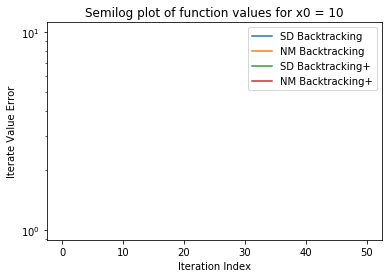

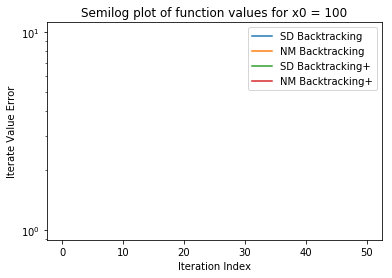

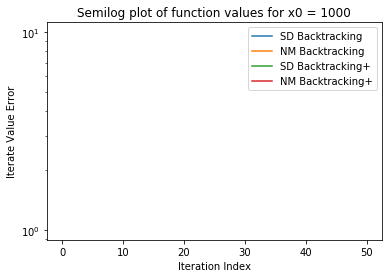

In [48]:
f = lambda x: -1/(x**2+1) - 1/((x-1)**2+1) - 1/((x-3/2)**2+1)
df = lambda x: 2*x/(x**2+1)**2 + 2*(x-1)/((x-1)**2+1)**2 + 2*(x-3/2)/((x-3/2)**2+1)**2
d2f = lambda x: 2*(1-3*x**2)/(x**2+1)**3 + 2*(1-3*(x-1)**2)/((x-1)**2+1)**3 + 2*(1-3*(x-3/2)**2)/((x-3/2)**2+1)**3

iter = 50 # 50 iterations of each

# Comparison with backtracking and accelerated backtracking using increments from both steepest descent and Newton's method

for x0 in [10,100,1000]:
    try:
        x_sd_bt = [x0]
        f_sd_bt = [f(x0)]
        x = x0
        for i in range(iter):
            x = backtracking1D(x, -df(x), f, df(x), alpha = 0.4, beta = 0.8)
            x_sd_bt.append(x)
            f_sd_bt.append(f(x))

        x_nm_bt = [x0]
        f_nm_bt = [f(x0)]
        x = x0
        for i in range(iter):
            x = backtracking1D(x, -df(x)/d2f(x), f, df(x))
            x_nm_bt.append(x)
            f_nm_bt.append(f(x))
    
        x_sd_abt = [x0]
        f_sd_abt = [f(x0)]
        x = backtracking1D(x0, -df(x0), f, df(x0))
        x_sd_abt.append(x)
        f_sd_abt.append(f(x))
        t = 1
        for i in range(2,iter):
            x, t = accelerated_backtracking1D(i+1, t, x_sd_abt[i-2], x_sd_abt[i-1], -df(x), f, df)
            x_sd_abt.append(x)
            f_sd_abt.append(f(x))

        x_nm_abt = [x0]
        f_nm_abt = [f(x0)]
        x = backtracking1D(x0, -df(x0)/d2f(x0), f, df(x0))
        x_nm_abt.append(x)
        f_nm_abt.append(f(x))
        t = 1
        for i in range(2, iter):
            x, t = accelerated_backtracking1D(i+1, t, x_nm_abt[i-2], x_nm_abt[i-1], -df(x)/d2f(x), f, df)
            x_nm_abt.append(x)
            f_nm_abt.append(f(x))

        # Compare convergence of function values with semilog plot
        sd_bt, = plt.semilogy(f_sd_bt, label='SD Backtracking')
        nm_bt, = plt.semilogy(f_nm_bt, label='NM Backtracking')
        sd_abt, = plt.semilogy(f_sd_abt, label='SD Backtracking+')
        nm_abt, = plt.semilogy(f_nm_abt, label='NM Backtracking+')
        plt.xlabel('Iteration Index')
        plt.ylabel('Iterate Value Error')
        plt.legend(handles=[sd_bt, nm_bt, sd_abt, nm_abt])
        plt.title('Semilog plot of function values for x0 = %s'%x0)
        plt.show()
    except OverflowError:
        print("Python cannot proceed with x0 =", x0, "because value is either too large or too small.")

In this case, $f$ is not convex.

# Exercise 4
(a) $\min_{x\in[0,3]}f(x)-log(x)-log(3-x)$
$$f(x)-log(x)-log(3-x)=\frac{1}{4}x^2-log(x)-log(3-x)$$
$$\begin{aligned}
\frac{d}{dx}\frac{1}{4}x^2-log(x)-log(3-x)&=\frac{x}{2}-\frac{1}{x}+\frac{1}{3-x}\\
&=\frac{-(x-1)(x^2-2x-6)}{2x(3-x)}=0\\
\implies x=1,1-\sqrt{7}<0,1+\sqrt{7}>3\\
\end{aligned}$$
So the optimal solution is $x_0=1$

(b)$f'(x)=\frac{x}{2}$, $\alpha=\beta=\frac{1}{2}$, $M=2$  
Outer iteration $x_{outer1}$:  

Inner iteration 1:  
$$F_1(x)=\frac{1}{4}x^2-\frac{1}{M}log(x)-\frac{1}{M}log(3-x)$$  
$$\Delta x_0=-F'_1(x_0)=-(\frac{x_0}{2}-\frac{1}{2x_0}+\frac{1}{2(3-x_0)})=-\frac{1}{4}$$  
Backtracking, steepest descent
$$f(x)=\frac{1}{4}x^2, \alpha=\beta=\frac{1}{2}, x_0=1, \Delta x_0=-\frac{1}{4}$$
$$f(x_0)+\beta^n\Delta x_0)\leq f(x_0)+\alpha\beta^n\Delta x_0f'(x_0)$$
For $n=0$  
$$\frac{9}{64}\leq\frac{3}{16}$$  
$$x_1=x_0+\beta^0\Delta x_0=\frac{3}{4}$$  

Inner iteration 2:
$$F_1(x)=\frac{1}{4}x^2-\frac{1}{M}log(x)-\frac{1}{M}log(3-x)$$  
$$\Delta x_1=-F'_1(x_1)=-(\frac{x_1}{2}-\frac{1}{2x_1}+\frac{1}{2(3-x_1)})=\frac{5}{72}$$  
Backtracking, steepest descent
$$f(x)=\frac{1}{4}x^2, \alpha=\beta=\frac{1}{2}, x_1=\frac{7}{9}, \Delta x_1=\frac{5}{72}$$
$$f(x_1)+\beta^n\Delta x_1)\leq f(x_1)+\alpha\beta^n\Delta x_1f'(x_1)$$
As $n\rightarrow\infty$, $f(x_1)+\beta^n\Delta x_1)=f(x_1)+\alpha\beta^n\Delta x_1f'(x_1)$
$$x_{outer1}=x_2=x_1+\beta^\infty\Delta x_1=\frac{3}{4}$$  

Outer iteration $x_{outer2}$:  

Inner iteration 1:  
$$F_2(x)=\frac{1}{4}x^2-\frac{1}{M^2}log(x)-\frac{1}{M^2}log(3-x)$$  
$$\Delta x_2=-F'_2(x_2)=-(\frac{x_2}{2}-\frac{1}{4x_2}+\frac{1}{4(3-x_2)})=-\frac{11}{72}$$  
Backtracking, steepest descent
$$f(x)=\frac{1}{4}x^2, \alpha=\beta=\frac{1}{2}, x_2=\frac{3}{4}, \Delta x_2=-\frac{11}{72}$$
$$f(x_2)+\beta^n\Delta x_2)\leq f(x_2)+\alpha\beta^n\Delta x_2f'(x_2)$$
For $n=0$  
$$LHS\leq RHS$$  
$$x_3=x_2+\beta^0\Delta x_2=\frac{43}{72}$$  

Inner iteration 2:
$$F_2(x)=\frac{1}{4}x^2-\frac{1}{M^2}log(x)-\frac{1}{M^2}log(3-x)$$  
$$\Delta x_3=-F'_2(x_3)=-(\frac{x_3}{2}-\frac{1}{4x_3}+\frac{1}{4(3-x_3)})=\frac{17083}{1071216}$$  
Backtracking, steepest descent
$$f(x)=\frac{1}{4}x^2, \alpha=\beta=\frac{1}{2}, x_3=\frac{43}{72}, \Delta x_1=\frac{17083}{1071216}$$
$$f(x_3)+\beta^n\Delta x_3)\leq f(x_3)+\alpha\beta^n\Delta x_3f'(x_3)$$
As $n\rightarrow\infty$, $f(x_3)+\beta^n\Delta x_3)=f(x_3)+\alpha\beta^n\Delta x_3f'(x_3)$
$$x_{outer2}=x_4=x_3+\beta^\infty\Delta x_3=\frac{43}{72}$$ 

# Exercise 5
$$\begin{aligned}  
\Phi'_{Q_1}(\alpha_0)&=-\frac{1}{4}(logit(-\alpha_0x_2y_2)+logit(-\alpha_0x_5y_5)+logit(-\alpha_0x_7y_7)+logit(-\alpha_0x_8y_8)\\  
&=-\frac{1}{4}(logit(-\alpha_0)+logit(0)+logit(-\alpha_0)+logit(-\alpha_0)\\
&=-\frac{1}{4}(\frac{3}{1+e}+\frac{1}{2})\\
\end{aligned}$$  
$$\alpha_1=\alpha_0-\gamma_0\Phi'_{Q_1}(\alpha_0)=1+\frac{1}{8}(\frac{3}{1+e}+\frac{1}{2})\approx1.163$$
$$\begin{aligned}  
\Phi'_{Q_2}(\alpha_1)&=-\frac{1}{4}(logit(-\alpha_1x_1y_1)+logit(-\alpha_1x_2y_2)+logit(-\alpha_1x_4y_4)+logit(-\alpha_1x_{10}y_{10})\\  
&=-\frac{1}{4}(logit(-\alpha_1)+logit(-\alpha_1)+logit(0)+logit(\alpha_1)\\
&\approx-0.435\\
\end{aligned}$$  
$$\alpha_2=\alpha_1-\gamma_1\Phi'_{Q_2}(\alpha_1)\approx1.337$$